# Exploring Niches for New Youtube Channel (U.S.) and Predicting Video Views

Youtube is a popular online video sharing and social media platform that [monetizes](https://support.google.com/youtube/answer/72857?hl=en) content creator through advertising revenue, channel membership, etc. In this project, we aim to find 3 potential niches for a new Youtube channel (U.S.) and explore a few factors associated with higher video views.    

We'll analyze a free dataset on Kaggle - ["Trending YouTube Video Statistics"](https://www.kaggle.com/datasnaek/youtube-new). Data is available for different regions, but we are specifically interested in the data from the U.S. since the new Youtube channel is targeting the U.S. audience. To achieve our goals, we'll try to find out:
* What are the popular, favorite, and engaging video categories?
* What are the 5 most popular, favorite, and engaging videos & channels?
* What are the factors associated with higher video view counts?
* What are the common tags of the videos in our potential niches?

We'll use Python libraries [Numpy](https://numpy.org/), [Pandas](https://pandas.pydata.org/), [Matplotlib](https://matplotlib.org/), and [Seaborn](https://seaborn.pydata.org/) to analyze and visualize the data.

## Download the Dataset

First, let's download the [dataset](https://www.kaggle.com/datasnaek/youtube-new) from Kaggle, which includes several months of data on daily trending YouTube videos. We'll do this using the `opendatasets` library.

In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od
dataset_url = "https://www.kaggle.com/datasnaek/youtube-new"
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: fooenglow
Your Kaggle Key: ········


100%|██████████| 201M/201M [00:08<00:00, 23.5MB/s] 


The dataset has been downloaded and extracted.

In [3]:
data_dir = './youtube-new'

In [4]:
import os
os.listdir(data_dir)

['RUvideos.csv',
 'CA_category_id.json',
 'JPvideos.csv',
 'DE_category_id.json',
 'USvideos.csv',
 'US_category_id.json',
 'FR_category_id.json',
 'DEvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'GBvideos.csv',
 'KR_category_id.json',
 'GB_category_id.json',
 'MX_category_id.json',
 'INvideos.csv',
 'RU_category_id.json',
 'MXvideos.csv',
 'IN_category_id.json',
 'CAvideos.csv',
 'FRvideos.csv']

The dataset is now ready for use. Before proceeding with the analysis, we need to do some data cleaning and manipulation.

## Data Preparation and Cleaning

Let's begin by importing all the relevant modules. 

In [9]:
!pip install pandas matplotlib seaborn numpy --upgrade --quiet

In [10]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline

Let's apply some default styles to our charts later. 

In [11]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Load Dataset into Pandas

For the purpose of this project, we're going to look at the Youtube video statistics of the U.S..

In [12]:
# Load the US trending video dataset
videos_us_df = pd.read_csv(data_dir + "/USvideos.csv")
videos_us_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


Let's remove some columns (`video_id`, `thumbnail_link`, `description`) which are not required for the purpose of this analysis. 

In [13]:
videos_us_df.drop(columns=["video_id", "thumbnail_link", "description"], inplace=True)

Let's explore the data quickly and see if there are any missing or invalid values.

In [14]:
videos_us_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   trending_date           40949 non-null  object
 1   title                   40949 non-null  object
 2   channel_title           40949 non-null  object
 3   category_id             40949 non-null  int64 
 4   publish_time            40949 non-null  object
 5   tags                    40949 non-null  object
 6   views                   40949 non-null  int64 
 7   likes                   40949 non-null  int64 
 8   dislikes                40949 non-null  int64 
 9   comment_count           40949 non-null  int64 
 10  comments_disabled       40949 non-null  bool  
 11  ratings_disabled        40949 non-null  bool  
 12  video_error_or_removed  40949 non-null  bool  
dtypes: bool(3), int64(5), object(5)
memory usage: 3.2+ MB


There are 40,949 entries and 13 columns in the dataframe with no missing values in any of the columns. 

### Create Additional Data 

Next, let's create some additional columns, i.e., category, likes-to-views and comments-to-views. We'll first extract the category from the `US_category_id.json` file using the corresponding `category_id`. 

In [15]:
# open US video category JSON file
f = open(data_dir + "/US_category_id.json")

# Read from file 
data = json.loads(f.read())

# Close the file
f.close()

In [16]:
# Take a glimpse into the json file
data

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

The json file has now been converted into a dictionary object. Let's turn the video category and its corresponding id into a key-value pair of a Python dictionary.

In [17]:
# Create empty dict to store category id and category title
category_and_id = {}

# Iterate over each item to get category id and title
for item in data["items"]:
    category_id = item["id"]
    category = item["snippet"]["title"]
    category_and_id[category_id] = category

print(category_and_id)

{'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '29': 'Nonprofits & Activism', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}


We're ready to add a new column `category` to the `videos_us_df` dataframe.

In [18]:
videos_us_df["category"] = videos_us_df["category_id"].apply(lambda x: category_and_id[str(x)])
videos_us_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   trending_date           40949 non-null  object
 1   title                   40949 non-null  object
 2   channel_title           40949 non-null  object
 3   category_id             40949 non-null  int64 
 4   publish_time            40949 non-null  object
 5   tags                    40949 non-null  object
 6   views                   40949 non-null  int64 
 7   likes                   40949 non-null  int64 
 8   dislikes                40949 non-null  int64 
 9   comment_count           40949 non-null  int64 
 10  comments_disabled       40949 non-null  bool  
 11  ratings_disabled        40949 non-null  bool  
 12  video_error_or_removed  40949 non-null  bool  
 13  category                40949 non-null  object
dtypes: bool(3), int64(5), object(6)
memory usage: 3.6+ MB


Next, let's calculate the likes-to-views ratio and comments-to-views ratio.

In [19]:
# Calculate likes-to-views ratio
videos_us_df["likes_to_views (%)"] = np.round(100 * videos_us_df["likes"] / videos_us_df["views"], 2)

# Calculate comments-to-views ratio
videos_us_df["comments_to_views (%)"] = np.round(100 * videos_us_df["comment_count"] / videos_us_df["views"], 2)

# Quick check to ensure calculation are done correctly
videos_us_df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category,likes_to_views (%),comments_to_views (%)
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,False,False,False,People & Blogs,7.69,2.13
1,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False,Entertainment,4.02,0.53
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,False,Comedy,4.58,0.26
3,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,False,False,Entertainment,2.96,0.63
4,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,False,False,Entertainment,6.31,0.84


### Parsing Dates

Now, we'll also parse the date to a more workable datetime format. There are two dates in the dataset, i.e., `trending_date` and `publish_time`. 

In [20]:
videos_us_df["trending_date"] = pd.to_datetime(videos_us_df["trending_date"], format="%y.%d.%m")

# Convert the isoformat datetime (ISO 8601) to datetime 
# https://www.w3.org/TR/NOTE-datetime
videos_us_df["publish_time"] = pd.to_datetime(videos_us_df["publish_time"])

We can see that both dates have been converted into the datetime format!

In [21]:
print(videos_us_df["trending_date"].dtype)
print(videos_us_df["publish_time"].dtype)

datetime64[ns]
datetime64[ns, UTC]


Let's take a quick look at the range of trending date of the videos in the dataset.

In [22]:
# Earliest trending date
earliest_td = videos_us_df["trending_date"].min()

# Latest trending date
latest_td = videos_us_df["trending_date"].max()

print("The trending date of the videos is within {} and {}".format(earliest_td, latest_td))

The trending date of the videos is within 2017-11-14 00:00:00 and 2018-06-14 00:00:00


We've completed the basic data cleaning and preparation. Next, let's explore and visualize some data to see if there are any interesting insights.

## Exploratory Analysis and Visualization

### Number and Percentage of Videos by Category

Let's first look at the different categories of videos trending on Youtube.

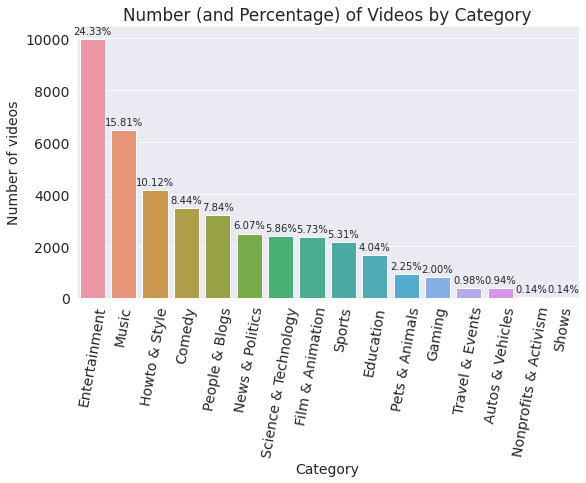

In [25]:
# Calculate the number of videos per category
video_categories = videos_us_df["category"].value_counts()

# Define x, y, and total number of videos 
x = video_categories.index
y = video_categories.values
total_videos = video_categories.sum()

# Create the barplot
splot = sns.barplot(x=x, y=y)

# Rotate xlabel to avoid clutter
for item in splot.get_xticklabels():
    item.set_rotation(80)

# Iterate over the bars and annotate the percentage of videos by category
for bar in splot.patches:
    
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    splot.annotate(format(100 * bar.get_height() / total_videos, '.2f') + "%", 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                    size=10, xytext=(0, 8),
                    textcoords='offset points')

plt.xlabel("Category")
plt.ylabel("Number of videos")
plt.title("Number (and Percentage) of Videos by Category")
    
plt.show();

Entertainment videos have the highest weightage (\~25%), followed by Music (\~15%) and Howto & Style (\~10%). 

### Number of Views, Likes & Comments

Now, let's look at the distribution of number of views, likes and comments. We can achieve this by plotting a histogram.

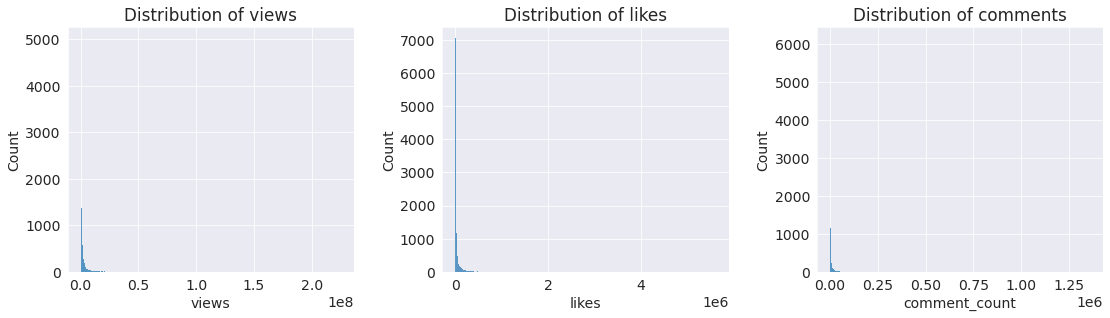

In [26]:
# Plot histogram of number of views, likes, and comments
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Pass the axes into seaborn
sns.histplot(ax=axes[0], data=videos_us_df, x="views")
axes[0].set_title("Distribution of views")

sns.histplot(ax=axes[1], data=videos_us_df, x="likes")
axes[1].set_title("Distribution of likes")

sns.histplot(ax=axes[2], data=videos_us_df, x="comment_count")
axes[2].set_title("Distribution of comments")

# Add padding between each subplot
plt.tight_layout(pad=2);

The data is heavily skewed and the bin size is very small. From the descriptive statistics below, we can see the following:
* Number of views: Interquartile range (IQR) is around 24,000 to 183,000, max is around 225 million
* Number of likes: IQR is around 5,400 to 56,000, max is around 5.6 million
* Comment counts: IQR is around 614 to 5,700, max is around 1.4 million

In [27]:
videos_us_df["views"].describe()

count    4.094900e+04
mean     2.360785e+06
std      7.394114e+06
min      5.490000e+02
25%      2.423290e+05
50%      6.818610e+05
75%      1.823157e+06
max      2.252119e+08
Name: views, dtype: float64

In [28]:
videos_us_df["likes"].describe()

count    4.094900e+04
mean     7.426670e+04
std      2.288853e+05
min      0.000000e+00
25%      5.424000e+03
50%      1.809100e+04
75%      5.541700e+04
max      5.613827e+06
Name: likes, dtype: float64

In [30]:
videos_us_df["comment_count"].describe()

count    4.094900e+04
mean     8.446804e+03
std      3.743049e+04
min      0.000000e+00
25%      6.140000e+02
50%      1.856000e+03
75%      5.755000e+03
max      1.361580e+06
Name: comment_count, dtype: float64

The extreme high values have made it challenging to visualize the distribution. To visualize the distribution better, we can define the bins in log space. 
*(Note that if there is any zero value, the log scale plot will encounter an error because log zero is undefined. We have to omit the zero or add 1 to the original value before applying log transformation.)*

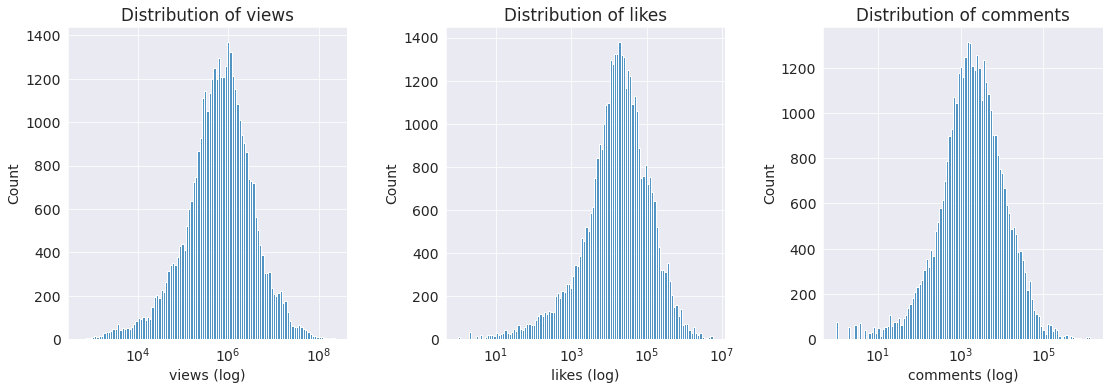

In [29]:
# Plot histogram of number of views, likes, and comments (log transformation)
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

# Pass the axes into seaborn
sns.histplot(ax=axes[0], data=videos_us_df, x="views", log_scale=True)
axes[0].set_title("Distribution of views")
axes[0].set_xlabel("views (log)")

# Omit zero "comment" to avoid error
sns.histplot(ax=axes[1], data=videos_us_df.loc[videos_us_df["likes"] != 0], x="likes", log_scale=True)
axes[1].set_title("Distribution of likes")
axes[1].set_xlabel("likes (log)")

# Omit zero "comment" to avoid error
sns.histplot(ax=axes[2], data=videos_us_df[videos_us_df["comment_count"] != 0], x="comment_count", log_scale=True)
axes[2].set_title("Distribution of comments")
axes[2].set_xlabel("comments (log)")

plt.tight_layout(pad=2);

The number of views, likes, and comments appear to be more normally distributed after log transformation.

### Correlation between Views, Likes, Dislikes & Comments

Let's explore the correlation between number of views, likes, dislikes and comments.

In [31]:
corr_matrix = videos_us_df[["views", "likes", "dislikes", "comment_count"]].corr()

Let's use `seaborn.heatmap` function to visualize the correlation.

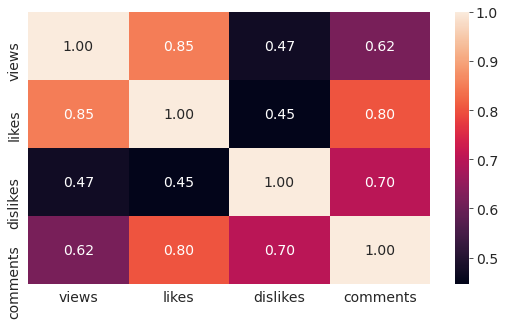

In [32]:
# Plot a heatmap with annotation of correlation (2 decimal places)
# https://stackoverflow.com/questions/54506626/how-to-understand-seaborns-heatmap-annotation-format
labels = ["views", "likes", "dislikes", "comments"]
sns.heatmap(corr_matrix, fmt=".2f", annot=True, xticklabels=labels, yticklabels=labels);

We can see a strong correlation between views & likes (0.85), and comments & likes (0.80). The correlation between dislikes and comments is also quite strong (0.70), implying that people who do not like the videos might have left negative comments. 

### Day and Time of Video Publication

Let's explore if a particular day and time of the week has more video publications. To do this, we need to convert the publish time (currently UTC) to the U.S. timezone, since we are working with the data from the U.S..

In [33]:
# Convert to US timezone
videos_us_df["publish_time"] = videos_us_df["publish_time"].dt.tz_convert("US/Central")
videos_us_df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category,likes_to_views (%),comments_to_views (%)
0,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 11:13:01-06:00,SHANtell martin,748374,57527,2966,15954,False,False,False,People & Blogs,7.69,2.13
1,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 01:30:00-06:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False,Entertainment,4.02,0.53
2,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 13:05:24-06:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,False,Comedy,4.58,0.26
3,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 05:00:04-06:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,False,False,Entertainment,2.96,0.63
4,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 12:01:41-06:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,False,False,Entertainment,6.31,0.84


We can see the `publish_time` now contains the Central U.S. timezone information (UTC-6). Let's create two additional columns `publish_day` and `publish_hour` to help us visualize which day and hours have more publications.

In [34]:
videos_us_df["publish_day"] = pd.DatetimeIndex(videos_us_df["publish_time"]).weekday
videos_us_df["publish_hour"] = pd.DatetimeIndex(videos_us_df["publish_time"]).hour
videos_us_df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category,likes_to_views (%),comments_to_views (%),publish_day,publish_hour
0,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 11:13:01-06:00,SHANtell martin,748374,57527,2966,15954,False,False,False,People & Blogs,7.69,2.13,0,11
1,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 01:30:00-06:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False,Entertainment,4.02,0.53,0,1
2,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 13:05:24-06:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,False,Comedy,4.58,0.26,6,13
3,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 05:00:04-06:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,False,False,Entertainment,2.96,0.63,0,5
4,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 12:01:41-06:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,False,False,Entertainment,6.31,0.84,6,12


We will look at the number of videos published on a certain day or at a certain hour using bar plots.

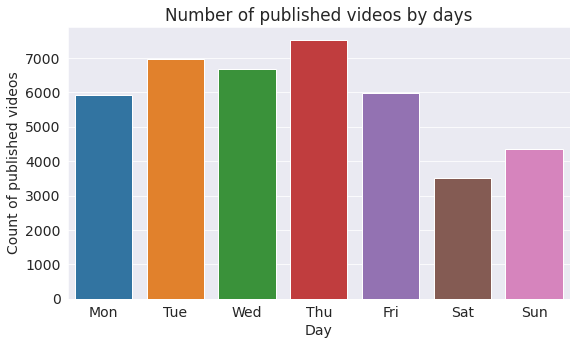

In [35]:
# Breakdown of videos by days
videos_by_days = videos_us_df["publish_day"].value_counts()
splot = sns.barplot(x=videos_by_days.index, y=videos_by_days.values)
splot.set(xlabel="Day", ylabel="Count of published videos")
splot.set_title("Number of published videos by days")

# Relabel x tick labels
splot.set_xticks(range(len(videos_by_days))) # set the ticks first
splot.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]); # the weekday with Monday=0, Sunday=6

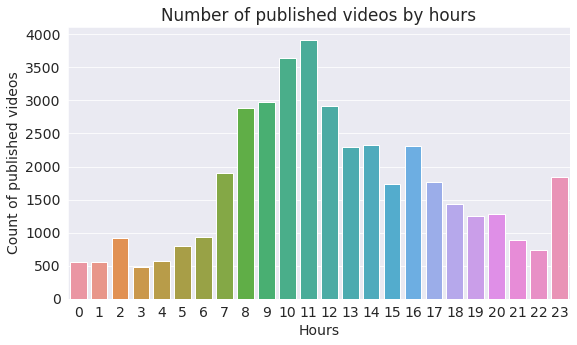

In [36]:
# Breakdown of videos by hours
videos_by_hours = videos_us_df["publish_hour"].value_counts()
splot = sns.barplot(x=videos_by_hours.index, y=videos_by_hours.values)
splot.set(xlabel="Hours", ylabel="Count of published videos")
splot.set_title("Number of published videos by hours");

We can see that there are more video publications from Monday to Friday, and less videos being published during the weekend (Saturday & Sunday). Most creators published their videos during the day time (peak from 8am to 12pm).

Next, let's answer some questions related to our goals of this project.

## Asking and Answering Questions

In this section, we'll dive in the following aspects:
* Popularity of video categories - the 5 most popular videos & channels
* Likability of video categories - the 5 most favorite videos & channels
* Engagement level of video categories - The 5 most engaging videos & channels
* Potential factors associated with higher video view counts
* Common tags of the videos in the identified potential niches

Here, we determine the popularity based on number of views, the likability based on likes-to-views ratio, and the engagement level based on comments-to-views ratio.

### Popularity of Video Categories - The 5 Most Popular Videos and Channels

To come up with a popular channel, it is important to choose the right video category. Let's see which category is the "hottest" among all by looking at the percentage of views.

In [39]:
# Group the total number of video views by category
views_by_cat = videos_us_df.groupby("category").agg({"views": sum})

# Sort from highest to lowest view
views_by_cat.sort_values(by="views", ascending=False, inplace=True)

# Calculate percentage of view of each category
total_views = views_by_cat["views"].sum()
views_by_cat["% views"] = np.round(100 * views_by_cat["views"] / total_views, 2)

Let's visualize the data with `seaborn` bar plot.

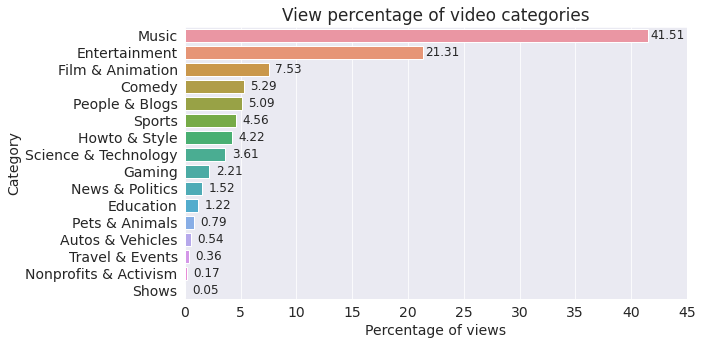

In [40]:
# Create a barplot
splot = sns.barplot(x="% views", y=views_by_cat.index, data=views_by_cat)

# Add title and labels
plt.xlabel("Percentage of views")
plt.ylabel("Category")
plt.title("View percentage of video categories")

# Set xtick frequency
splot.set_xticks(np.arange(0,50,5))

# Annotate the view percentage
# Iterate over each bar
for bar in splot.patches:
    
  # Using Matplotlib's annotate function and passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_width()
  # y-coordinate: bar.get_y() + bar.get_height() / 2
    splot.annotate(format(bar.get_width(), '.2f'), 
                   (bar.get_width(), bar.get_y() + bar.get_height() / 2), 
                   ha='center', va='center', size=12, 
                   xytext=(20, 0), textcoords='offset points'
                   )

We can see that the top 3 video categories with most views in the U.S. are Music (41.51%), Entertainment (21.31%), and Film & Animation (7.53%). Youtube viewers in the U.S. are generally less interested in categories such as Science & Technology, Gaming, Education, Travel, Nonprofits, and Pets.

Let's see the top 5 videos with the highest view. 

In [41]:
# 5 videos with the highest views
videos_us_df.sort_values("views", ascending=False).head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category,likes_to_views (%),comments_to_views (%),publish_day,publish_hour
38547,2018-06-02,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-05 23:00:07-05:00,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,517232,False,False,False,Music,2.23,0.23,5,23
38345,2018-06-01,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-05 23:00:07-05:00,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",220490543,4962403,338105,512337,False,False,False,Music,2.25,0.23,5,23
38146,2018-05-31,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-05 23:00:07-05:00,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",217750076,4934188,335462,509799,False,False,False,Music,2.27,0.23,5,23
37935,2018-05-30,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-05 23:00:07-05:00,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",210338856,4836448,326902,501722,False,False,False,Music,2.30,0.24,5,23
37730,2018-05-29,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-05 23:00:07-05:00,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",205643016,4776680,321493,496211,False,False,False,Music,2.32,0.24,5,23


The top 5 popular videos are all related to music (>200 million views each). They are also from the same channel "ChildishGambinoVEVO".

Let's look at the top 5 popular channels. 

In [42]:
# Group by channels - compute unique categories, number of titles, sum of views 
channels_by_views = videos_us_df[["channel_title", "category", "title", "views"]].groupby("channel_title").agg({
                    "category": "unique", "title": "size", "views":sum})

# Sort the channels by views
channels_by_views.sort_values("views", ascending=False, inplace=True)
channels_by_views.rename(columns={"title": "number of videos"}, inplace=True)

# Filter the top 5 popular channels
channels_by_views.head()

,category,number of videos,views
channel_title,,,
ChildishGambinoVEVO,[Music],25,3758488765
ibighit,[Music],80,2235906679
Dude Perfect,[Sports],131,1870085178
Marvel Entertainment,"[Entertainment, Autos & Vehicles]",125,1808998971
ArianaGrandeVevo,[Music],43,1576959172


It probably comes as no surprise that "ChildishGambinoVEVO" is the most popular channel as it features the top 5 popular videos, each with >200 million views! You might also be familiar with Marvel Entertainment, which features the popular series "The Avengers". 

### Likability of Video Categories - The 5 Most Favored Videos and Channels

We have seen the popular video categories earlier on. However, videos with the more views are not necessarily the more favored. Sometimes, the video title and thumbnail may spark the curiosity of the viewers to click on the video, only to realize that they do not like the content as much. Hence, it is meaningful to look at other metrics, such as the likes-to-views ratio. 

Let's visualize the likes-to-views ratio of each video category using `seaborn` library.

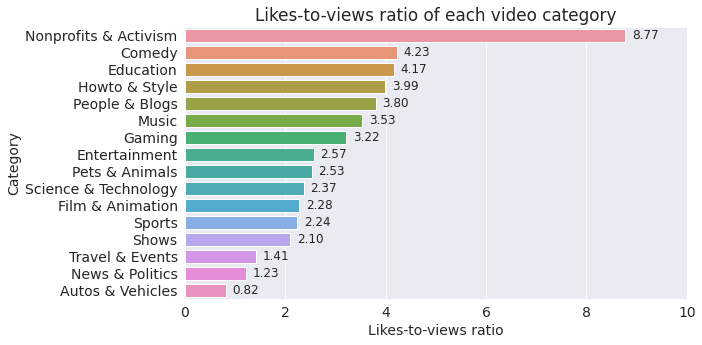

In [43]:
# Group the total number of video likes and views by category
views_by_fav = videos_us_df.groupby("category").agg({"likes": sum, "views": sum})
views_by_fav["likes_to_views"] = np.round(100 * views_by_fav["likes"] / views_by_fav["views"], 2)

# Sort from highest to lowest view
views_by_fav.sort_values(by="likes_to_views", ascending=False, inplace=True)

# Create a barplot
splot = sns.barplot(x="likes_to_views", y=views_by_fav.index, data=views_by_fav)

# Add title and labels
plt.xlabel("Likes-to-views ratio")
plt.ylabel("Category")
plt.title("Likes-to-views ratio of each video category")

# Set xtick frequency
splot.set_xticks(np.arange(0,11,2))

# Annotate the view percentage
# Iterate over each bar
for bar in splot.patches:
    
  # Using Matplotlib's annotate function and passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_width()
  # y-coordinate: bar.get_y() + bar.get_height() / 2
    splot.annotate(format(bar.get_width(), '.2f'), 
                   (bar.get_width(), bar.get_y() + bar.get_height() / 2), 
                   ha='center', va='center', size=12, 
                   xytext=(20, 0), textcoords='offset points'
                   )

We can see that although videos from Music, Entertainment, and Film & Animation have more views based on section [Popularity of Video Category](#Popularity-of-Video-Category---The-10-Most-Favored-Videos-and-Channels), they do not have as high likes-to-views ratio as other categories such as Nonprofits & Activism (8.77), Comedy (4.23), Education (4.17), etc. 

Let's see the top 5 videos with the highest likes-to-views ratio.

In [44]:
# 5 videos with the highest likes-to-views
videos_us_df.sort_values("likes_to_views (%)", ascending=False).head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category,likes_to_views (%),comments_to_views (%),publish_day,publish_hour
10200,2018-01-04,Bruno Mars - Finesse (Remix) [Feat. Cardi B] [...,Bruno Mars,10,2018-01-03 22:49:43-06:00,"Bruno Mars|""Finesse""|""Cardi B""|""Finesse Remix""...",548621,159356,2374,19455,False,False,False,Music,29.05,3.55,2,22
608,2017-11-17,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,10,2017-11-16 23:00:01-06:00,"Luis|""Fonsi""|""Demi""|""Lovato""|""Échame""|""La""|""Cu...",499946,135292,3528,12094,False,False,False,Music,27.06,2.42,3,23
22174,2018-03-07,j-hope 'Airplane' MV,ibighit,10,2018-03-06 09:00:10-06:00,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",5275672,1401915,6268,158127,False,False,False,Music,26.57,3.00,1,9
14428,2018-01-27,dodie - Secret For The Mad,dodieVEVO,10,2018-01-26 12:00:15-06:00,"dodie|""Secret""|""For""|""The""|""Mad""|""Ditto""|""Musi...",129130,32755,98,2964,False,False,False,Music,25.37,2.30,4,12
5025,2017-12-09,Louis Tomlinson - Miss You (Official Video),LouisTomlinsonVEVO,10,2017-12-08 10:00:04-06:00,"Louis Tomlinson|""Miss You""|""Pop""|""Syco Music""",985998,241679,793,26259,False,False,False,Music,24.51,2.66,4,10


We can see that the 5 videos with the highest likes-to-views ratio are all in the music category. Although the overall music category does not have the highest likes-to-views ratio, there can be a few "hit" music videos that went viral and received a lot of likes!

Let's take a look at the 5 most favored channels.  

In [45]:
# Group by channels - compute unique categories, number of titles, sum of likes, sum of views 
channels_by_likes = videos_us_df[["channel_title", "category", "title", "likes", "views"]].groupby("channel_title").agg({
                    "category": "unique", "title": "size", "likes":sum, "views":sum})
channels_by_likes["likes_to_views(%)"] = np.round(100 * channels_by_likes["likes"] / channels_by_likes["views"], 2)

# Sort the channels by likes-to-views
channels_by_likes.sort_values("likes_to_views(%)", ascending=False, inplace=True)
channels_by_likes.rename(columns={"title": "number of videos"}, inplace=True)

# Filter the top 5 favorite channels
channels_by_likes.head()

,category,number of videos,likes,views,likes_to_views(%)
channel_title,,,,,
Desimpedidos,[Sports],3,3052417,15093148,20.22
KickThePj,[Film & Animation],1,15262,83200,18.34
Amber Liu,[Entertainment],5,133164,772801,17.23
Scotty Sire,[Comedy],6,717219,4439770,16.15
Max Joseph,[Film & Animation],1,141731,895352,15.83


We can see that the 5 most favored channels are not solely restricted to music category (as seen in the top 5 favored videos). They have a variety of categories such as Sports, Film & Animation, Comedy, and Entertainment. These channels have much higher likes-to-views ratio than the average likes-to-views ratio of the category they are in. 

### Engagement Level of Video Categories - The 5 Most Engaging Videos and Channels

After looking at the likability of the videos, we are going to analyze engagment level of the videos. The engagement level will be measured by the interaction with the viewers, which is closely related to the number of comments of each video. 

Let's start by visualizing the engagement level of each video category using `seaborn` library.

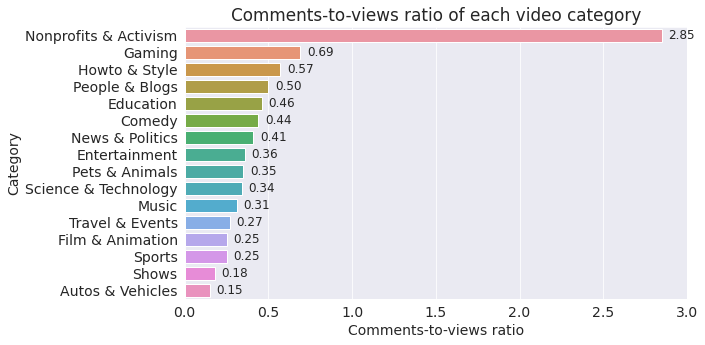

In [46]:
# Group the total number of video views and comments by category
views_by_com = videos_us_df.groupby("category").agg({"comment_count": sum, "views": sum})
views_by_com["comments_to_views"] = np.round(100 * views_by_com["comment_count"] / views_by_com["views"], 2)

# Sort from highest to lowest comments-to-views
views_by_com.sort_values(by="comments_to_views", ascending=False, inplace=True)

# Create a barplot
splot = sns.barplot(x="comments_to_views", y=views_by_com.index, data=views_by_com)

# Add title and labels
plt.xlabel("Comments-to-views ratio")
plt.ylabel("Category")
plt.title("Comments-to-views ratio of each video category")

# Set xtick frequency
splot.set_xticks(np.arange(0,3.5,0.5))

# Annotate the view percentage
# Iterate over each bar
for bar in splot.patches:
    
  # Using Matplotlib's annotate function and passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_width()
  # y-coordinate: bar.get_y() + bar.get_height() / 2
    splot.annotate(format(bar.get_width(), '.2f'), 
                   (bar.get_width(), bar.get_y() + bar.get_height() / 2), 
                   ha='center', va='center', size=12, 
                   xytext=(20, 0), textcoords='offset points'
                   )

From the chart, Nonprofits & Activism has much higher engagement level comparing to other categories, followed by Gaming and "Howto & Style".

Let's see the top 5 videos with the highest comments-to-views ratio.

In [47]:
# 5 videos with the highest comments-to-views
videos_us_df.sort_values("comments_to_views (%)", ascending=False).head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category,likes_to_views (%),comments_to_views (%),publish_day,publish_hour
32568,2018-05-04,FULL FACE OF MAKEUP IM THROWING OUT 2018,Laura Lee,26,2018-05-02 14:19:15-05:00,"Laura88Lee|""full face""|""full face using produc...",708610,42225,566,83363,False,False,False,Howto & Style,5.96,11.76,2,14
5046,2017-12-09,FULL FACE USING 7-ELEVEN MAKEUP!,Manny Mua,26,2017-12-06 17:01:16-06:00,"7-eleven makeup|""7/11 makeup""|""seven-eleven""|""...",871037,62851,1437,98853,False,False,False,Howto & Style,7.22,11.35,2,17
19795,2018-02-23,NEW WET N WILD 'GOTH-O-GRAPHIC' COLLECTION | H...,jeffreestar,26,2018-02-21 13:09:41-06:00,"jeffree star|""jeffree star review""|""wet n wild...",1533800,122320,1156,171128,False,False,False,Howto & Style,7.97,11.16,2,13
32769,2018-05-05,FULL FACE OF MAKEUP IM THROWING OUT 2018,Laura Lee,26,2018-05-02 14:19:15-05:00,"Laura88Lee|""full face""|""full face using produc...",817323,46384,764,90279,False,False,False,Howto & Style,5.68,11.05,2,14
20018,2018-02-24,NEW WET N WILD 'GOTH-O-GRAPHIC' COLLECTION | H...,jeffreestar,26,2018-02-21 13:09:41-06:00,"jeffree star|""jeffree star review""|""wet n wild...",1709663,130959,1428,183579,False,False,False,Howto & Style,7.66,10.74,2,13


We can see that the 5 most engaging videos are all in the category of "Howto & Style". It might seem surprising because overall, "Howto & Style" is not the most engaging category. 

But taking a deeper thought, it seems reasonable because Howto & Style videos naturally spark a lot of discussions and interactions. There might be certain videos with very high engagement (e.g., Viewers might exchange ideas on the stylish make-up or spring clothing collection with each other.) 

Let's now identify the top 5 engaging channels.  

In [48]:
# Group by channels - compute unique categories, number of titles, sum of comments, sum of views 
channels_by_comments = videos_us_df[["channel_title", "category", "title", "comment_count", "views"]].groupby("channel_title").agg({
                    "category": "unique", "title": "size", "comment_count":sum, "views":sum})
channels_by_comments["comments_to_views(%)"] = np.round(100 * channels_by_comments["comment_count"] / channels_by_comments["views"], 2)

# Sort the channels by comments-to-views
channels_by_comments.sort_values("comments_to_views(%)", ascending=False, inplace=True)
channels_by_comments.rename(columns={"title": "number of videos"}, inplace=True)

# Filter the top 5 engaging channels
channels_by_comments.head()

,category,number of videos,comment_count,views,comments_to_views(%)
channel_title,,,,,
Manny Mua,[Howto & Style],6,611835,8104400,7.55
GingerPale,[Comedy],17,418771,8931549,4.69
Bethany Mota,[Howto & Style],5,239959,5849270,4.10
Jessii Vee,[Comedy],5,19113,497080,3.85
jeffreestar,[Howto & Style],38,3009734,83243512,3.62


We can see that most of the top 5 engaging channels have a video category of Howto & Style or Comedy. These channels have much higher comments-to-views ratio than the average comments-to-views ratio of the category they are in. 

### Predict Video Views

As one of the factors to start a new Youtube channel is to monetize it, the view count of a video is important to earn ad-based revenue. 

Now, we'd like to employ statistical modeling to explore a few factors which might be associated with the view count of a video. We will explore the relationship between `views` and independent variables such as `comment_count`, `category`, and `likes`.

Here, we'll fit a multiple linear regression model (ordinary least square), i.e., to find a line that best fits all the data. The model can help us predict the average number of views for a Youtube video.

There are a few [assumptions](https://www.jmp.com/en_my/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions.html) of using the linear regression model:
* Linearity: The relationship between X and the mean of Y is linear.
* Homoscedasticity: The variance of residual is symmetrically distributed around zero with constant variance.
* Independence: Observations are independent of each other.
* Normality: Residuals are normally distributed.

We'll double check against the assumptions. Now, let's first import the [statsmodels](https://www.statsmodels.org/stable/index.html) library, which provides classess and functions for the estimation of many different statistical models.

In [49]:
import statsmodels.api as sm

Let's take a quick look the relationship between `views` & `comment_count`, and `views` & `likes` using a scatterplot. Remember, the underlying assumption of a linear regression model is a linear relationship between the input and output variables.

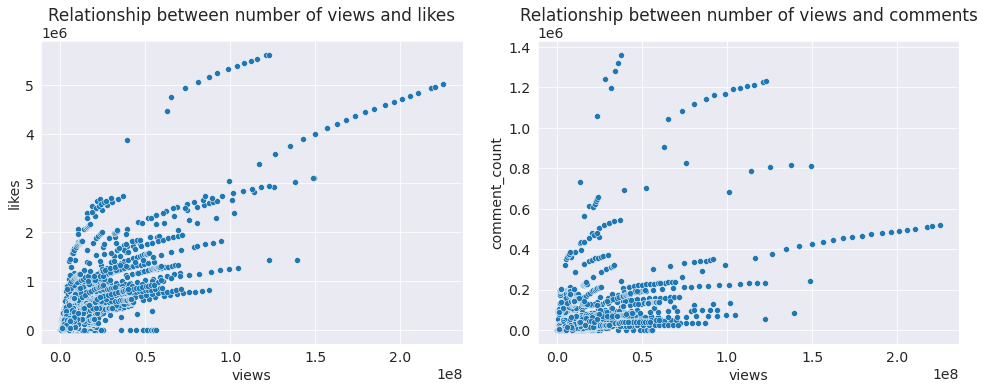

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pass the axes into seaborn
sns.scatterplot(ax=axes[0], data=videos_us_df, x="views", y="likes")
axes[0].set_title("Relationship between number of views and likes", pad=20)

sns.scatterplot(ax=axes[1], data=videos_us_df, x="views", y="comment_count")
axes[1].set_title("Relationship between number of views and comments", pad=20)

plt.tight_layout(pad=2);

There is a clutter of data points at the lower left region. Recall from section [Number of Views, Likes & Comments](#Number-of-Views,-Likes-&-Comments), the distributions of the number of likes, views and comments are all positively skewed. Let's apply log transformation and visualize the relationship again.

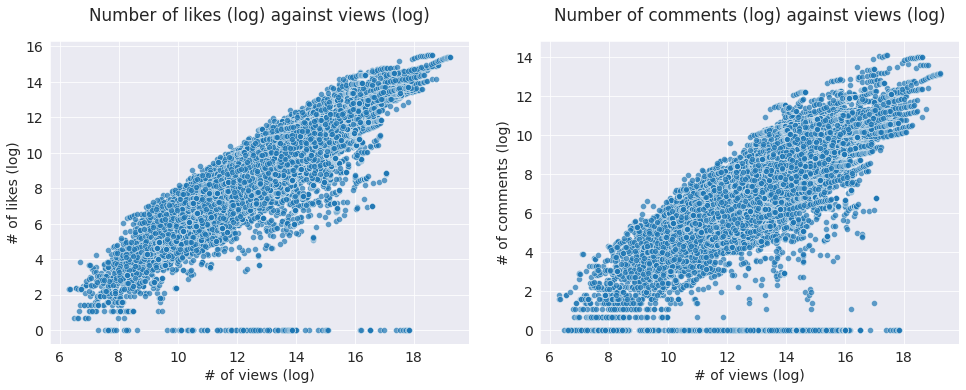

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pass the axes into seaborn
x = np.log(videos_us_df["views"])
y_1 = np.log(videos_us_df["likes"] + 1) # add 1 to avoid error from np.log(0)
sns.scatterplot(ax=axes[0], x=x, y=y_1, alpha=0.7)
axes[0].set_title("Number of likes (log) against views (log)", pad=20)
axes[0].set_xlabel("# of views (log)")
axes[0].set_ylabel("# of likes (log)")

y_2 = np.log(videos_us_df["comment_count"] + 1) # add 1 to avoid error from np.log(0)
sns.scatterplot(ax=axes[1], x=x, y=y_2, alpha=0.7)
axes[1].set_title("Number of comments (log) against views (log)", pad=20)
axes[1].set_xlabel("# of views (log)")
axes[1].set_ylabel("# of comments (log)")

plt.tight_layout(pad=2);

The relatioship looks more linear now. As seen from the chart, the number of likes of zero and the number of comments of zero do not serve as a good predictor of the number of views. This might be because some content creators disabled the function of likes and comments of the videos. 

Let's take a quick look at the number of videos with either ratings or comments being disabled.

In [52]:
# Create a boolean mask 
rating_or_comment_disabled = (videos_us_df["ratings_disabled"] | videos_us_df["comments_disabled"])

# Select videos with ratings or comments disabled
videos_us_df.loc[rating_or_comment_disabled, ["title", "category", "views"]].sort_values("views", ascending=False)

,title,category,views
18150,To Our Daughter,People & Blogs,56111957
17916,To Our Daughter,People & Blogs,55063465
17716,To Our Daughter,People & Blogs,54454945
17496,To Our Daughter,People & Blogs,53183123
17286,To Our Daughter,People & Blogs,51243149
...,...,...,...
536,WWSB Channel 7: Sarasota Police stepping up ...,News & Politics,1338
13398,Bannon Arrives to Testify on Capitol Hill,News & Politics,835
13187,Bannon Arrives to Testify on Capitol Hill,News & Politics,820
12961,Bannon Arrives to Testify on Capitol Hill,News & Politics,810


There are 696 videos with the rating and comment functions being disabled. We will rule out these videos from the linear regression model because the zero number of likes and comments was not reflective of the real situation, should the viewers be able to leave their likes or comments.

In [53]:
# Select data for regression model
videos_for_reg = videos_us_df.loc[~rating_or_comment_disabled].copy()
videos_for_reg.shape

(40253, 18)

#### Fit Linear Regression Model and Interpret Results

Now, we are ready to fit the linear regression model. *(Note: We have added 1 to `likes` and `comment_count` to include the videos with zero likes or comments while avoiding the error arising from $ln0$.)* 

$ln (views) = \alpha + \beta_{1}ln (likes + 1) + \beta_{2}ln (comment\_count + 1) + \beta_{3} X  $ ;  ($X$ refers to video category)

Over here, we select Entertainment category to be the reference category because it has the largest proportion of videos (n=9964) compared to other video categories. This might help us reduce the multicollinearity (a problem leading to unreliable and unstable estimates of regression coefficients) in the model. *(More information can be found [here](https://statisticalhorizons.com/multicollinearity).)*

In [54]:
model = sm.OLS.from_formula("np.log(views) ~ np.log(likes + 1) + np.log(comment_count + 1) + C(category, Treatment('Entertainment'))", data=videos_for_reg)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(views)   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                 1.115e+04
Date:                Sun, 01 Aug 2021   Prob (F-statistic):               0.00
Time:                        07:44:35   Log-Likelihood:                -43406.
No. Observations:               40253   AIC:                         8.685e+04
Df Residuals:                   40235   BIC:                         8.700e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            6.0617      0.020    297.879      0.000       6.022       6.102
C(category, Treatment('Entertainment'))[T.Autos & Vehicles]          0.4058      0.038     10.728      0.000       0.332       0.480
C(category, Treatment('Entertainment'))[T.Comedy]                   -0.3383      0.014    -23.852      0.000      -0.366      -0.311
C(category, Treatment('Entertainment'))[T.Education]                -0.4537      0.019    -23.914      0.000      -0.491      -0.417
C(category, Treatment('Entertainment'))[T.Film & Animation]          0.1394      0.016      8.466      0.000       0.107       0.172
C(category, Treatment('Entertainment'))[T.Gaming]                   -0.3117      0.026    -11.894      0.000      -0.363      -0.260
C(category, Treatment('Entertainment'))[T.Howto & Style]            -0.5706      0.013    -43.063      0.000      -0.597      -0.545
C(category, Treatment('Entertainment'))[T.Music]                    -0.2703      0.012    -22.717      0.000      -0.294      -0.247
C(category, Treatment('Entertainment'))[T.News & Politics]           0.1593      0.018      8.929      0.000       0.124       0.194
C(category, Treatment('Entertainment'))[T.Nonprofits & Activism]    -0.5582      0.098     -5.694      0.000      -0.750      -0.366
C(category, Treatment('Entertainment'))[T.People & Blogs]           -0.3675      0.015    -25.098      0.000      -0.396      -0.339
C(category, Treatment('Entertainment'))[T.Pets & Animals]           -0.3282      0.025    -13.338      0.000      -0.376      -0.280
C(category, Treatment('Entertainment'))[T.Science & Technology]     -0.2189      0.016    -13.293      0.000      -0.251      -0.187
C(category, Treatment('Entertainment'))[T.Shows]                    -0.0434      0.095     -0.459      0.646      -0.229       0.142
C(category, Treatment('Entertainment'))[T.Sports]                    0.3839      0.017     22.417      0.000       0.350       0.417
C(category, Treatment('Entertainment'))[T.Travel & Events]           0.0962      0.036      2.654      0.008       0.025       0.167
np.log(likes + 1)                                                    0.6444      0.005    131.704      0.000       0.635       0.654
np.log(comment_count + 1)                                            0.1631      0.005     32.411      0.000       0.153       0.173
==============================================================================
Omnibus:                     5698.766   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17884.261
Skew:                           0.737   Prob(JB):    

Let's try to interpret the result of the regression model. Please note that the interpretation of coefficient of a particular predictor variable is valid only when all other predictor variables are held constant. *(Refer to this [StackExchange post](https://stats.stackexchange.com/questions/240572/log-log-regression-dummy-variable-and-index) and [Medium article](https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9) for more details on the following interpretation of regression coefficient.)*

* $R^2$ tells us the goodness of fit. $R^2 = 0.825$ means 82.5% of the variance in the number of views are explained by the predictor variables collectively.
* $\alpha = 6.0617$. The average view count is $e^{\alpha}$ ($e^{6.0617} = 429$) when a video has zero likes, zero comments with a category of "Entertainment". 
* $\beta_{1} = 0.6444$. The average view percentage change is approximately equal to the like percentage change to the power of $\beta_{1}$, i.e., $\frac{Y_{2}}{Y_{1}} \approx (\frac{X_{2}}{X_{1}})^{\beta_{1}}$. In this case, a 2-fold increase in number of likes increases the average view count by approx. $2^{0.6444}$ = 1.56 fold.  
* $\beta_{2} = 0.1631$. The average view percentage change is approximately equal to the comment percentage change to the power of $\beta_{2}$, i.e., $\frac{Y_{2}}{Y_{1}} \approx (\frac{X_{2}}{X_{1}})^{\beta_{2}}$. In this case, a 2-fold increase in number of comments increases the average view count by approx. $2^{0.1631}$ = 1.12 fold. 
* $\beta_{3}$ tells us the percentage change in number of views (i.e., $e^{\beta_{3}} - 1$) based on the change of category against reference category ("Entertainment"). For example, a music video, comparing to an entertainment video, increases the number of views by $e^{\beta_{3}} - 1 = e^{-0.2703} - 1 = -0.237$ (-23.7%) (negative number means decrease in views).

We can see that number of likes and comment counts are significant predictors (p<0.001) of the number of views. Also,  a few video categories (i.e., Autos & Vehicles, Film & Animation, News & Politics, Sports, Travel & Events) are significantly associated with more views comparing to the entertainment video. This might seem puzzled because looking at the earlier analysis, most of these categories are not in the top 5 based on popularity, likability, and engagement level.

| Rank | Popularity       | Likability           | Engagement           |
|------|------------------|----------------------|----------------------|
| 1    | Music            | Nonprofit & Activism | Nonprofit & Activism |
| 2    | Entertainment    | Comedy               | Gaming               |
| 3    | Film & Animation | Education            | Howto & Style        |
| 4    | Comedy           | Howto & Style        | People & Blogs       |
| 5    | People & Blogs   | People & Blogs       | Education            |

<center><i>Summary table - top 5 video categories by popularity, likability, and engagement level.</i></center>

The reason for this can be attributed to the inclusion of number of likes and comment counts as predictor variables. In other words, the effect of each category on the number of views was affected by the effect of likes and comments. For example, music is a very popular category and at the same time receives a lot of likes - putting both category and number of likes in the model makes music category look like an inferior choice (regression coefficient = -0.2703), although the positive effect of music category on the number of views might have already been accounted for by the positive effect of the number of likes. 

To explore a bit further, we can test if there are high correlations between the independent variables (i.e., multicollinearity) by calculating the variance inflation factor (VIF). VIF estimates how much the variance of a coefficient is “inflated” because of linear dependence with other predictors. For instance, a VIF of 1.5 tells us that the variance of a particular coefficient is 50% larger than it would be if that predictor was completely uncorrelated with all the other predictors.

VIF starts from 1 and has no upper limit. A VIF of 1 is the best we can have as this means that there is no multicollinearity for this variable. There is no consensus on how high the VIF has to be to constitute a problem. The following is a rule of thumb to for interpreting the VIF: 
* 1 = not correlated
* 1 to 5 = moderately correlated
* Greater than 5 = highly correlated

The higher the VIF, the more likely that there is a problem with the independent variables, leading to unreliable estimates and questionable p-values.

In [55]:
# Check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get the X variables from the model
variables = model.exog
vif = [variance_inflation_factor(variables, i) for i in range(1, variables.shape[1])] # start from 1 to exclude VIF of intercept
print(vif)

[1.0335464922385682, 1.2553722432453993, 1.1211721069737284, 1.1677118191816378, 1.0753102954796951, 1.2865746335433477, 1.5148470059312524, 1.3712667002580814, 1.0047677864509112, 1.2223172335649004, 1.0705739297414076, 1.1661789386985277, 1.0044329107610304, 1.1745654837976132, 1.0328531852684883, 7.734751763368362, 6.886545057994497]


The VIF of last 2 variables (`np.log(likes + 1)`, `np.log(comment_count + 1)`) is quite high, suggesting that these 2 variables are correlated in some ways. This is not surprising as from our [earlier exploratory analysis](#Correlation-between-Views,-Likes,-Dislikes-&-Comments), the correlation between `likes` and `comment_count` is 0.80. To improve the model, you can drop either of them from the predictor variables. For now, we will stick to the original model and take a look at the assumptions.

#### Checking Assumptions

Let's check the normality assumption by looking at the Q-Q plot and histogram of the residuals. 

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


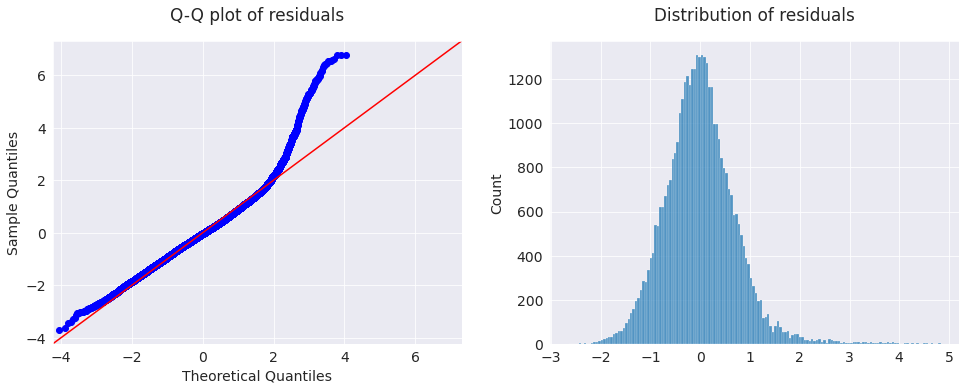

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pass the axes into seaborn
residuals = result.resid
sm.qqplot(data=residuals, line="45", fit=True, ax=axes[0])
axes[0].set_title("Q-Q plot of residuals", pad=20)

sns.histplot(ax=axes[1], x=residuals)
axes[1].set_title("Distribution of residuals", pad=20)

plt.tight_layout(pad=2);

We can see that the residuals are quite normally distributed when the error is less than 2. However, there is a positive skewness in the overall distribution of the residuals. 

Let's now check the assumption of homoscedasticity (i.e., error is constant along the values of the dependent variable).

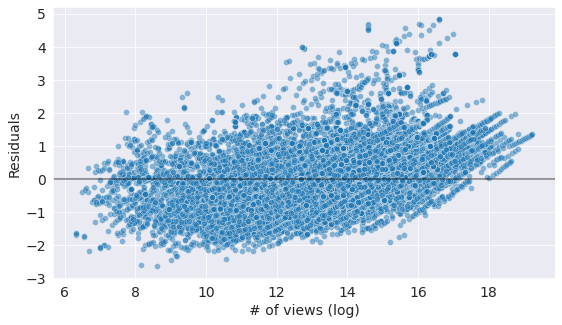

In [57]:
# y-value is represented by model.endog
splot = sns.scatterplot(x=model.endog, y=residuals, alpha=0.5);
splot.set_xlabel("# of views (log)")
splot.set_ylabel("Residuals")
splot.axhline(0, color="black", alpha=0.5);

The error appears to have slight positive correlation with the number of views, instead of randomly scattered around the line of zero.

Both non-normality in the residuals and heteroscedasticity (error is not constant along the value of dependent variable) suggests that our model is not consistent across the full range of observed data. In other words, the predictive ability of the independent variables (as calculated in their beta weights) is not the same across the full range of dependent variable - the predictors mean different things at different levels of the dependent variable.

Our model does not seem to predict the high number of views well, as seen from both the histogram (positive skewness of residuals distribution) and the scatter plot (higher residuals with higher views). This can be because the views of "viral" video needs different modeling approaches (e.g., exponential model), or we have not included all the possible predictor variables (e.g., clickbait, video thumbnail, tags, titles, number of channel-likes, subscriber count, etc.).

#### Summary of Statistical Modeling of Video Views

In short, the multiple linear regression model here is a rather "raw" model to illustrate the important concepts & assumptions of linear regression. There are definitely limitations in terms of the selection of independent variables and modeling, and the accuracy of view prediction is questionable. Nonetheless, we can see that number of likes and comments are significant predictors of the number of views.

In future, we can build a view prediction model using more advanced machine learning models (e.g., gradient boosting, random forest, neural networks, natural language processing), taking into consideration of other features (e.g., subscriber count, video titles, video thumbnails, etc.). There can also be separate models for "normal" videos vs. "viral" videos.

### Select Three Potential Niches - What Are The Popular Video Tags?

We've come to the final stage of selecting the potential niches. Considering different factors collectively (e.g., big competitors in the same niche, popularity, likability, engagement, factors contributing to higher view count, barrier to entry, etc.), the three selected potential niches for the new Youtube channel are:
1. Music
2. Comedy
3. Howto & Style 

If we were to choose category such as "Entertainment" or "Film & Animation", it is very challenging to compete against the big brands or production houses in the market.

*(We did not draw reference from the regression coefficient of the individual video category included in the regression model, as there are quite a number of limitations as mentioned earlier.)*

Before we finish this project, let's take a sneak peek at the common video tags seen in the music, comedy, and People & Blogs videos to spark some ideas of the potential video content. We'll do this by generating WordClouds, which will highlight the popular words of all the videos. 

Let's start by importing the wordcloud library.

In [71]:
!pip install wordcloud --upgrade --quiet

Now, we extract the tags into respective lists.

In [73]:
# Music tags
tags_music = videos_us_df.loc[videos_us_df["category"].isin(["Music"]), "tags"]
tags_music_ls = tags_music.values

# Comedy tags
tags_com = videos_us_df.loc[videos_us_df["category"].isin(["Comedy"]), "tags"]
tags_com_ls = tags_com.values

# Howto & Style tags
tags_hs = videos_us_df.loc[videos_us_df["category"].isin(["Howto & Style"]), "tags"]
tags_hs_ls = tags_hs.values

Before we're able to use the tags to generate a wordcloud, we need to clean up the tags and concatenate them into a text string. Let's see an example on how the "raw" tags look like. 

In [74]:
tags_hs_ls

array(['refinery29|"refinery 29"|"r29"|"r29 video"|"video"|"refinery29 video"|"female"|"empowerment"|"house tour"|"sweet digs"|"new york city"|"apartment decor"|"interior design"|"home tour"|"big apple"|"real estate"|"apartment"|"new apartment tour"|"bedroom tour"|"new apartment"|"house tour 2017"|"living room"|"living room decor"|"walk through"|"nyc apartment"|"new house"|"kitchen tour"|"modern home"|"decorating on a budget"|"my new house"|"moving out"|"video blog"|"manhattan"|"NY"|"central park"',
       'Smart mug|"Heated thermos"|"tech"|"gift idea"|"unboxed"|"Ember mug"|"ember"|"Ember review"|"Heated mug"|"teardown"|"technology"|"Thermous"|"winter"|"holiday"|"christmas"|"gift"|"mug"|"unboxing"',
       'iphone x|"iphonex makeup"|"iphonex test"|"new iphone"|"iphone vs makeup"|"face id"|"face id test"|"iphone x challenge"|"iphone hack"|"iphone x makeup tutorial"|"makup tutorial"|"2017 makeup"|"promise phan"|"twins face id"|"twins iphonex"|"iphonex face"|"iphonex review"',
       ...,

There are many vertical bars and quotes to be removed. Let's define a function that cleans up the text and returns the output of the text string below.

In [75]:
def get_text_from_tag(tag):
    # Remove the quotation mark in the tag
    tag = tag.replace('"', '')
    # Split the tag, join them by space and convert to lower case
    tag = ' '.join(tag.split("|")).lower()
    return tag

# Test and see if the function is working correctly
tag_words = ""
for tag in tags_hs_ls[1:3]:
    tag_words += get_text_from_tag(tag) + " "

print(tag_words)

smart mug heated thermos tech gift idea unboxed ember mug ember ember review heated mug teardown technology thermous winter holiday christmas gift mug unboxing iphone x iphonex makeup iphonex test new iphone iphone vs makeup face id face id test iphone x challenge iphone hack iphone x makeup tutorial makup tutorial 2017 makeup promise phan twins face id twins iphonex iphonex face iphonex review 


We're one step away from generating the wordclouds. Let's start from music, comedy to Howto & Style.

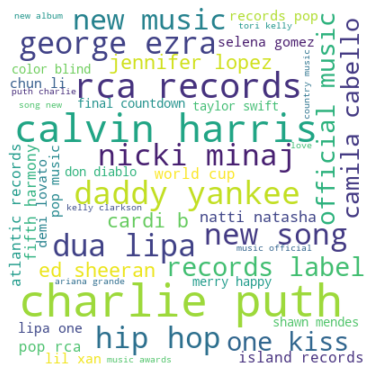

In [76]:
# Import all necessary modules
from wordcloud import WordCloud, STOPWORDS
 
tag_words = ""

# Create stopword list (will be eliminated from wordcloud)
stopwords = set(STOPWORDS)
stopwords.update(["video", "youtube"])

for tag in tags_music_ls:
    tag_words += get_text_from_tag(tag) + " "

wordcloud = WordCloud(width = 400, height = 400,
                background_color ='white', max_words=300,
                stopwords = stopwords,
                min_font_size = 10).generate(tag_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show();

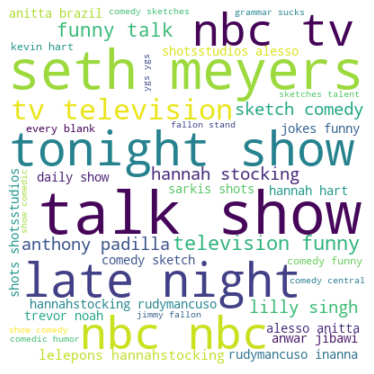

In [77]:
tag_words = ""

for tag in tags_com_ls:
    tag_words += get_text_from_tag(tag) + " "

wordcloud = WordCloud(width = 400, height = 400,
                background_color ='white', max_words=300,
                stopwords = stopwords,
                min_font_size = 10).generate(tag_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show();

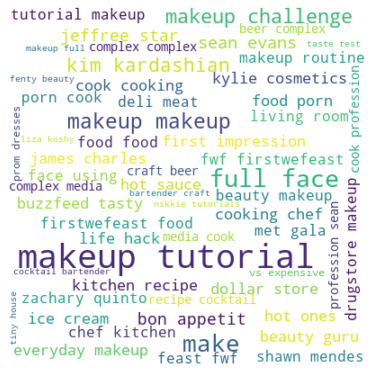

In [78]:
tag_words = ""

for tag in tags_hs_ls:
    tag_words += get_text_from_tag(tag) + " "

wordcloud = WordCloud(width = 400, height = 400,
                background_color ='white', max_words=300,
                stopwords = stopwords,
                min_font_size = 10).generate(tag_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show();

From the WordClouds, we can see some popular words:
* Music: Charlie Puth, Calvin Harris, RCA records, New Music, Hip Hop, etc.
* Comedy: talk show, tonight show, Hannah Stocking, funny talk, etc.
* Howto & Style: makeup, beauty, kitchen, cosmetics, cooking, etc.

We can borrow some concepts and ideas from these video tags, and incorporate some of these elements in our own videos.

## Inferences and Conclusion

In this project, we analyzed the trending Youtube video statistics of the U.S. to identify 3 potential niches that we can venture into for a new Youtube channel. We looked at the popularity, likability, and engagement level of the video categories.

| Rank | Popularity       | Likability           | Engagement           |
|------|------------------|----------------------|----------------------|
| 1    | Music            | Nonprofit & Activism | Nonprofit & Activism |
| 2    | Entertainment    | Comedy               | Gaming               |
| 3    | Film & Animation | Education            | Howto & Style        |
| 4    | Comedy           | Howto & Style        | People & Blogs       |
| 5    | People & Blogs   | People & Blogs       | Education            |

<center><i>Summary table - top 5 video categories by popularity, likability, and engagement level.</i></center>

We also identified the factors associated with number of video views using a multiple linear regression model with independent variables such as number of likes, comment count and video category. 

The three potential niches we selected are: Music, Comedy, Howto & Style. 

## Next Steps

These are the potential next steps after this project:
* Get a dataset covering a longer period: The current dataset only covered videos from Nov 2017 to Jun 2018. There might be "seasonality" of the videos which were not covered. It would be good to have at least one-year data.
* Adapt a different statistical model to predict number of video views: The current multiple linear regression model is very preliminary. It would be good to see how other models and inclusion of more independent variables could help in fine-tuning the model.

## References

Here are some of the useful resources:
* Linear regression: [Assumptions](https://towardsdatascience.com/assumptions-of-linear-regression-fdb71ebeaa8b), [Multicollinearity and variance inflation factor](https://medium.com/swlh/multicollinearity-and-variance-inflation-factor-bc74af36b1c9), [Why normality of residuals is required](https://www.researchgate.net/post/Why-do-the-residuals-need-to-be-normal-when-carrying-out-multi-level-modeling)
* Log transformation: [Interpretations](https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9)
* [Ways to detect and remove outliers](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)
* [Q-Q plot examples](https://www.ucd.ie/ecomodel/Resources/QQplots_WebVersion.html)
* [Word Cloud Generation](https://www.datacamp.com/community/tutorials/wordcloud-python)
* [How to write markdown and latex in Jupyter Notebook](https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd)
